In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('./data/tendulkar_ODI.csv')

In [3]:
df.Runs.value_counts()

1       16
2       14
0       12
4        9
21       8
        ..
95       1
70       1
200*     1
120      1
102      1
Name: Runs, Length: 118, dtype: int64

In [4]:
df = df[~(df.Runs == 'DNB')]

In [5]:
df = df[~(df.Runs == 'TDNB')]

In [6]:
d = lambda x: int(x[:-1]) if x[-1] == "*" else int(x)

df.Runs = df.Runs.apply(d)

<AxesSubplot:ylabel='Frequency'>

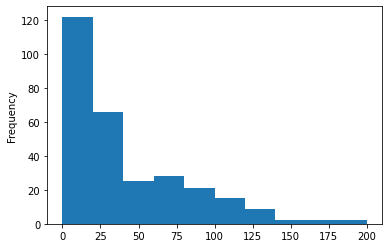

In [7]:
df.Runs.plot.hist()

In [8]:
df.head()

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90


In [19]:
df['4s'] = df['4s'].apply(lambda x: int(x))

In [20]:
df['4s'].sum()

1316

In [21]:
odi = pd.read_csv('./data/odi-batting.csv')

odi.head()

,Country,Player,Runs,MatchDate,Weekday,Ground,Versus,Balls
0,Afghanistan,Mohammad Shahzad,118,16-02-2010,Tue,Sharjah CA Stadium,Canada,121
1,Afghanistan,Mohammad Shahzad,110,01-09-2009,Tue,VRA Ground,Netherlands,111
2,Afghanistan,Mohammad Shahzad,100,16-08-2010,Mon,Cambusdoon New Ground,Scotland,72
3,Afghanistan,Mohammad Shahzad,82,10-07-2010,Sat,Hazelaarweg,Netherlands,108
4,Afghanistan,Mohammad Shahzad,57,01-07-2010,Thu,Sportpark Westvliet,Canada,57


In [22]:
odi['Century'] = odi.Runs.apply(lambda x: 1 if x >= 100 else 0)


In [35]:
odi.groupby(by='Player').sum()

,Runs,Balls,Century
Player,,,
Aamer Hanif,89,128,0
Aamer Malik,556,988,0
Aamir Nazir,13,20,0
Aamir Sohail,4780,7283,5
Aaqib Javed,267,426,0
...,...,...,...
Zameer Zahir,3,13,0
Zubin E Surkari,328,654,0
Zulfiqar Ali,39,79,0


In [23]:
pd.pivot_table(data=odi, values='Century', columns='Player', aggfunc=np.sum)

Player,Aamer Hanif,Aamer Malik,Aamir Nazir,Aamir Sohail,Aaqib Javed,Aaron J Redmond,Aashish R Kapoor,Aasif Y Karim,Aavishkar M Salvi,Abdool M Samad,...,Zahid Razzak,Zahid Shah,Zahoor Elahi,Zain Abbas,Zakir Khan,Zameer Zahir,Zubin E Surkari,Zulfiqar Ali,Zulqarnain Haider,Zulquarnain
Century,0,0,0,5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [43]:
odi['StrikeRate'] = (odi.Runs/odi.Balls)*100

In [52]:
odi[(odi['Century'] == 1) & (odi.StrikeRate > 150)]

,Country,Player,Runs,MatchDate,Weekday,Ground,Versus,Balls,Century,StrikeRate
138,Australia,Ricky T Ponting,164,12-03-2006,Sun,The Wanderers Stadium,South Africa,105,1,156.190476
2872,Australia,Shane R Watson,185,11-04-2011,Mon,Shere Bangla National Stadium,Bangladesh,96,1,192.708333
6053,Bangladesh,Shakib Al Hasan,105,29-10-2009,Thu,Shere Bangla National Stadium,Zimbabwe,69,1,152.173913
6054,Bangladesh,Shakib Al Hasan,104,11-08-2009,Tue,Queens Sports Club,Zimbabwe,64,1,162.500000
14615,India,Mohammad Azharuddin,108,17-12-1988,Sat,Moti Bagh Stadium,New Zealand,65,1,166.153846
14912,India,Yuvraj Singh,138,14-11-2008,Fri,Madhavrao Scindia Cricket Ground,England,78,1,176.923077
15152,India,Virender Sehwag,125,11-03-2009,Wed,Seddon Park,New Zealand,74,1,168.918919
19704,Ireland,Kevin J O'Brien,113,02-03-2011,Wed,M.Chinnaswamy Stadium,England,63,1,179.365079
27707,Pakistan,Javed Miandad,119,31-12-1982,Fri,Gaddafi Stadium,India,77,1,154.545455
28153,Pakistan,Shahid Afridi,124,21-06-2010,Mon,Rangiri Dambulla International Stad.,Bangladesh,60,1,206.666667


In [53]:
odi['Year'] = odi.MatchDate.apply(lambda x: x[-4:])

In [56]:
odi[(odi.Century == 1) & (odi.Country == 'India')].groupby('Year').sum()

,Runs,Balls,Century,StrikeRate
Year,,,,
1983,175,138,1,126.811594
1984,309,407,3,228.848831
1986,204,224,2,183.076923
1987,440,406,4,438.959853
1988,523,571,5,501.500772
1989,209,217,2,194.464532
1990,313,372,3,257.223775
1991,214,231,2,201.203143
1992,114,148,1,77.027027
